# Analyze Sort-seq
Sort-seq library question 2: Does TF expression increase monotonically with half site number?

This module analyzes sort-seq data and made Figure 5B in Recio et al., 

Code written by PSR

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat

In [2]:
def make_sns_boxplot(df, xvalue, yvalue, color, hue_value, output_file, xl, yl):
    """ This function makes a boxplot"""
    ax = sns.boxplot(x=xvalue, y=yvalue, data=df, hue = hue_value, palette= color, showfliers = True)
    ax.set_ylim([-1000, 7500])
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    #plt.show()
    plt.savefig(output_file, bbox_inches='tight')

Analyze individual promoter expression data

In [9]:
expression_file = "L4_gal4_anova_analysis.csv"
expression_file2 = "L4_leu3_anova.csv"
expression_file3 = "L4_tea1_anova.csv"
expression_file4 = "L4_yrm1_final.csv"


expression_ko_file = "L4_gal4KO_anova_analysis.csv"
expression_ko_file2 = "L4_leu3_ko.csv"
expression_ko_file3 = "L4_tea1_ko.csv"
expression_ko_file4 = "L4_yrm1_ko.csv"




df = pd.read_csv(expression_file, header= None)
df_ko = pd.read_csv(expression_ko_file2, header= None)


filter_out = "GAL"
filter_out2 = "GID8"

df = df.loc[(~df[1].str.contains(filter_out))& (~df[1].str.contains(filter_out2))]
df_ko = df_ko.loc[(~df_ko[1].str.contains(filter_out))& (~df_ko[1].str.contains(filter_out2))]



df.columns = ['Sequence_type', 'Promoter', 'halfsite_num', 'Expression']
df_ko.columns = ['Sequence_type', 'Promoter', 'halfsite_num', 'Expression']

df["Expression"] = pd.to_numeric(df["Expression"])
df_ko["Expression"] = pd.to_numeric(df_ko["Expression"])



In [10]:
df

,Sequence_type,Promoter,halfsite_num,Expression
0,WT,ADR1pr_reg1,15,8721.071522
1,WT,HAP4pr_reg1,11,7831.710691
2,WT,STP4pr_reg1,10,4239.085211
6,mutCGG1,ADR1pr_reg1,0,675.510536
7,mutCGG2,ADR1pr_reg1,0,4783.209415
...,...,...,...,...
1701,space_mutation,HAP4pr_reg1,7,1251.999401
1702,space_mutation,STP4pr_reg1,7,2931.382329
1705,space_mutation,ADR1pr_reg1,9,4095.898372
1706,space_mutation,HAP4pr_reg1,6,4577.902737


In [16]:
#filter_out2 = "control"
wt_halfsitepr= df.loc[(df['Sequence_type']== "WT")]
pr_names = wt_halfsitepr["Promoter"].tolist()
pr_names = list(set(pr_names))

In [17]:
pr_names

['ADR1pr_reg1', 'STP4pr_reg1', 'HAP4pr_reg1']

In [18]:
site_mut = []
site_mutko = []


In [19]:
#make dataframes for all promoters and store in a list
#def make_q2_promoter_df(df, pr_names):

for i in pr_names: 
    a,b,c = make_q2_df(df, i)
    a2,b2,c2 = make_q2_df(df_ko, i)
    site_mut.append(a)
    site_mutko.append(a2)


 
    #return site_mut, rand_control, cg_control


In [20]:
site_mut

[      Sequence_type     Promoter  halfsite_num   Expression
 26    site_mutation  ADR1pr_reg1             0   602.411344
 27    site_mutation  ADR1pr_reg1             1  3281.608628
 28    site_mutation  ADR1pr_reg1             1  1063.570684
 29    site_mutation  ADR1pr_reg1             1  1072.972532
 30    site_mutation  ADR1pr_reg1             1  1730.123847
 ...             ...          ...           ...          ...
 1253  site_mutation  ADR1pr_reg1            14  4606.556839
 1254  site_mutation  ADR1pr_reg1            14  5954.909499
 1255  site_mutation  ADR1pr_reg1            14  6081.517994
 1256  site_mutation  ADR1pr_reg1            14  5735.838910
 1257  site_mutation  ADR1pr_reg1            15  7694.582828
 
 [276 rows x 4 columns],
       Sequence_type     Promoter  halfsite_num   Expression
 182   site_mutation  STP4pr_reg1             0   841.346873
 183   site_mutation  STP4pr_reg1             1  1510.866388
 184   site_mutation  STP4pr_reg1             1   680.8948

In [14]:
site_mut[0]["difference"] = site_mut[0]["Expression"]-site_mutko[0]["Expression"]
site_mut[1]["difference"] = site_mut[1]["Expression"]-site_mutko[1]["Expression"]
site_mut[2]["difference"] = site_mut[2]["Expression"]-site_mutko[2]["Expression"]

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [15]:
# site_mut[1]["Expression"] = pd.to_numeric(site_mut[1]["Expression"])

In [16]:
site_mut[2]

,Sequence_type,Promoter,halfsite_num,Expression,difference
27,site_mutation,LEU3_Ipt1/Snf11pr,0,1831.950801,718.719457
28,site_mutation,LEU3_Ipt1/Snf11pr,1,2611.841421,1222.760576
29,site_mutation,LEU3_Ipt1/Snf11pr,1,1952.123898,131.661106
30,site_mutation,LEU3_Ipt1/Snf11pr,1,3324.998877,555.261510
31,site_mutation,LEU3_Ipt1/Snf11pr,1,1712.516873,401.713980
...,...,...,...,...,...
974,site_mutation,LEU3_Ipt1/Snf11pr,8,2983.320680,724.471217
975,site_mutation,LEU3_Ipt1/Snf11pr,8,3101.703131,-314.733578
976,site_mutation,LEU3_Ipt1/Snf11pr,8,3055.847127,1147.942480
977,site_mutation,LEU3_Ipt1/Snf11pr,8,2344.990622,540.364153


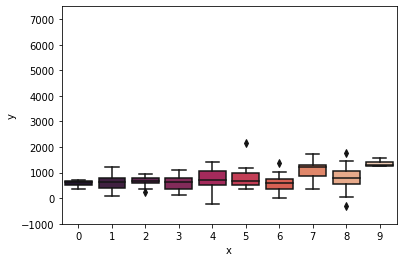

In [19]:
#ax = sns.boxplot(x="halfsite_num", y="difference", data=site_mut[1], palette= "rocket", showfliers = False)

def make_sns_boxplot(df, xvalue, yvalue, color, hue_value, output_file, xl, yl):
    ax = sns.boxplot(x=xvalue, y=yvalue, data=df, hue = hue_value, palette= color, showfliers = True)
    ax.set_ylim([-1000, 7500])
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    #plt.show()
    plt.savefig(output_file, bbox_inches='tight')
    
make_sns_boxplot(site_mut[2], "halfsite_num", "difference", "rocket", None, "q2_leu3_ipt1_snf11_ko.pdf", 'x', 'y')









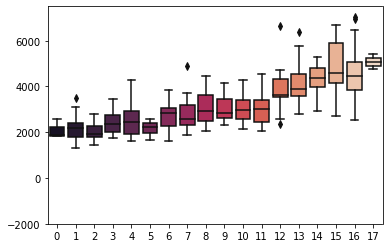

In [134]:
make_sns_boxplot(site_mut[1], "halfsite_num", "Expression", "rocket", None, "q2_leu3_mdh2_sitemut.pdf", '', '')



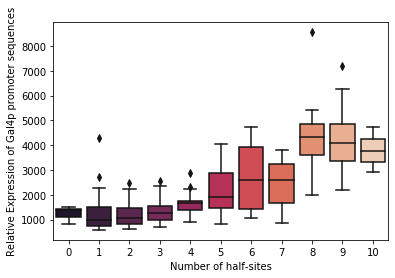

In [20]:
make_sns_boxplot(site_mut[2], "halfsite_num", "Expression", "rocket", None, "q2_stp4_sitemut.pdf", 'Number of half-sites', 'Relative Expression of Gal4p promoter sequences')

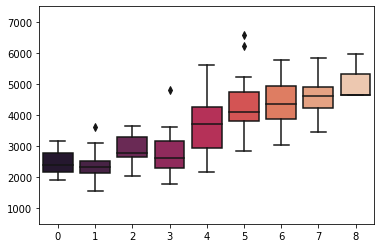

In [86]:
make_sns_boxplot(site_mut[2], "halfsite_num", "Expression", "rocket", None, "q2_leu3_sod1_ado1_sitemut.pdf", "", "")

Analyze combined promoter expression data

In [41]:
controls_rand_combined = df.loc[(df['Sequence_type']== "WT")|df['Sequence_type'].str.contains("random_site_mutation")]
controls_cg_combined = df.loc[(df['Sequence_type']== "WT")|df['Sequence_type'].str.contains("site_mutation_CG")]

In [42]:
halfsite_pr = df.loc[df['Sequence_type'].str.contains("site_mutation")]
halfsite_pr = halfsite_pr.loc[~df['Sequence_type'].str.contains("random")]
halfsite_pr = halfsite_pr.loc[~df['Sequence_type'].str.contains("CG")]